# Project Name: Personal Protective Equipment detection from video and live camera.

### Prepared By: Taslima Akter

### Intern, AI, PACE, University of Winnipeg

### Prepared For: Bit Space Development, Winnipeg, Manitoba, Canada

# Objective of the Project:

-- Main purpose of the project is to build a Machine Learning Model, which will detect personal protective equipment from the recorded video and live cam. This model will only detect face-shield, glooves, goggles, helmet, mask and vest as a PPE items.


# Feasibility of the Study:

PPE detection is an emerging solution for the managers as it automates the tracking and monitoring of PPE equipment wear-ability. Workforce is not required for supervision, updates and analysis. Besides offering uninterrupted monitoring of workers, video analytics further detects those working without gloves or masks.


# Assessment Criteria:

-- How accurately the model is detecting 'PPE items' from the recorded and live video data.

-- Analysing matric (accuracy, confusion matrix, training loss)

-- Amount of time and computer power consumption.


# Machine Learning Algorithm Used to Build the Project:

I have used YoLOv8 algorithm to train my custom dataset. I have taken one of the PPE public dataset from 'Roboflow' website.
    

# Reason of Selecting YOLOv8/ Comparison between YOLOv8 and SSD MobileNetv3:
    
-- I have used SSD MobileNetv3 to build two other projects to detect 'person' and 'vehicles' from the recorded and live video. I have used pre-trained SSD MobileNetv3 model, which is already trained with COCO dataset. The model contains 80 classes including the 'person' and some 'vehicles', which I have selected to detect. So, I found it easy to use by selecting the required classes for the each projects. This pre-train model requires less computer power to run and provide satisfactory output for the default classes.

-- I choose YOLOv8 instead of SSD MobileNetv3 when for the project, I require to train the model with custom dataset. I have done enough researched but found no such documents and lectures in the websites to follow for training the SSD MobileNetv3 model with custom dataset; some I found but was not easy to understand. On the otherhand, there are so many documents and projects available about YOLOv5 and Yolov8 model publicly in the internet, and I have followed some of them to made the PPE detection project. All in all, guideline is a fact.

-- I found it easy to understand and use compared to SSD MobileNetv3 because of the availability of many ML projects in the internet.

-- YOLOv8 provides some default featues, such as %of accuracy to detect an object, which I haven't found in the SSD MobileNetv3 (I have to write extra code for this to get in SSD). I think this % is a very useful feature to fix the 'confThreshold' value if the model have some error in misclassification.

-- From the research, I get to know that YOLO provides better accuracy compared to MobileNet SSD, which provides more detection speed.

-- For SSD MobileNetv3, when the object size is tiny, the performance dips a touch. YOLO could be a higher choice even when the object size is small. Some PPE items are not that much big, that is also a reason of selecting YOLOv8.

--Besides, I am interested to learn and observe different models to enrich my knowledge.


# How to Train YOLOv8 Object Detection on a Custom Dataset

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced last month. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.


## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps To Build the Model with Custom Dataset

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
#!nvidia-smi

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


In [4]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:03<00:00, 2.09MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 18.4MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 14.7ms
Speed: 0.5ms pre-process, 14.7ms inference, 42.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


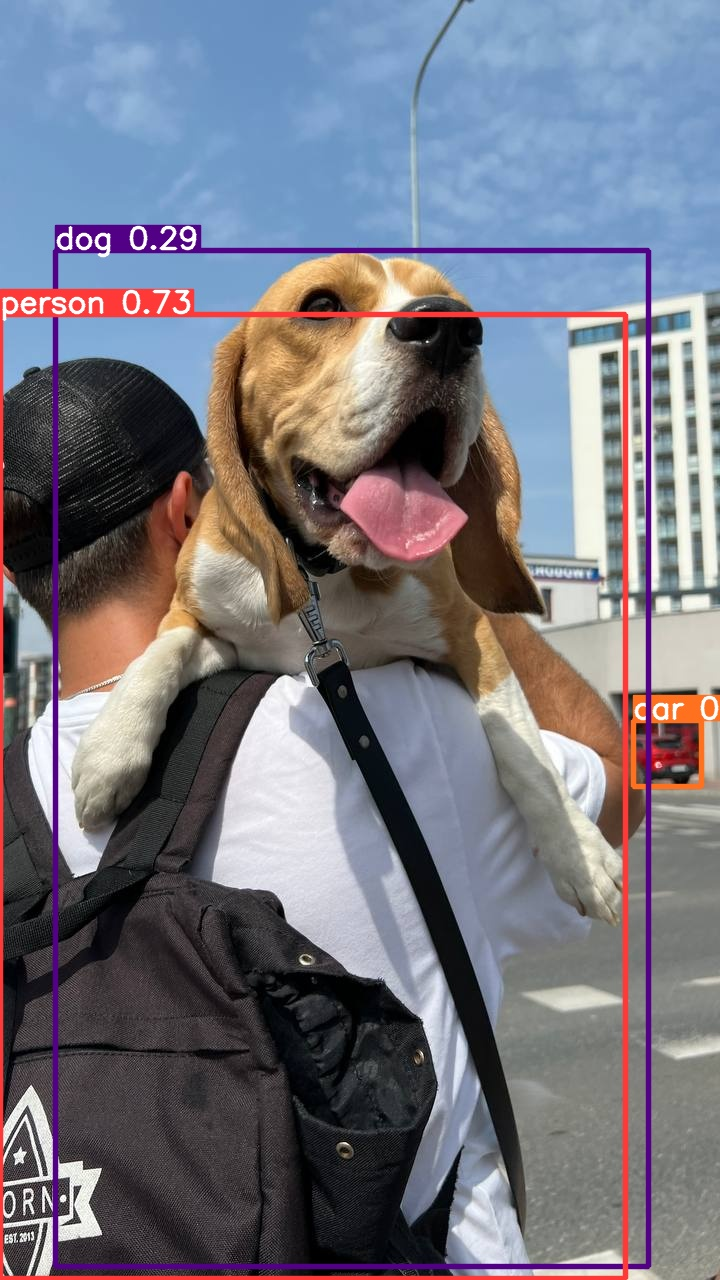

In [7]:
#Checking the model is detecting object correctly or not from image
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [8]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [9]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

# Collecting Custom Dataset:

## All about Roboflow Universe :

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.

### I have taken my PPE dataset from Roboflow.

## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together. 

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




# Downloading PPE Dataset From Roboflow 

In [12]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="YpfpPmshzz5wk0Kmcwlr")
project = rf.workspace("detectionsmartvison").project("ppe-dataset-frs2s")
dataset = project.version(6).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.4 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to ppe-dataset-6 in yolov8:: 100%|██████████| 145698/145698 [00:19<00:00, 7321.40it/s]


## Custom Training

Note: In this project, I only use 3 epochs because of limitation of GPU but to get good accuracy it is required to
train the dataset with more epochs.

In [13]:
#Train the model with custom dataset
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=3 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 331MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/ppe-dataset-6/data.yaml, epochs=3, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fals

In [14]:
#Display what included in the train folder.
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1676433825.25ed392f9e32.1722.0  val_batch0_labels.jpg
F1_curve.png					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


/content


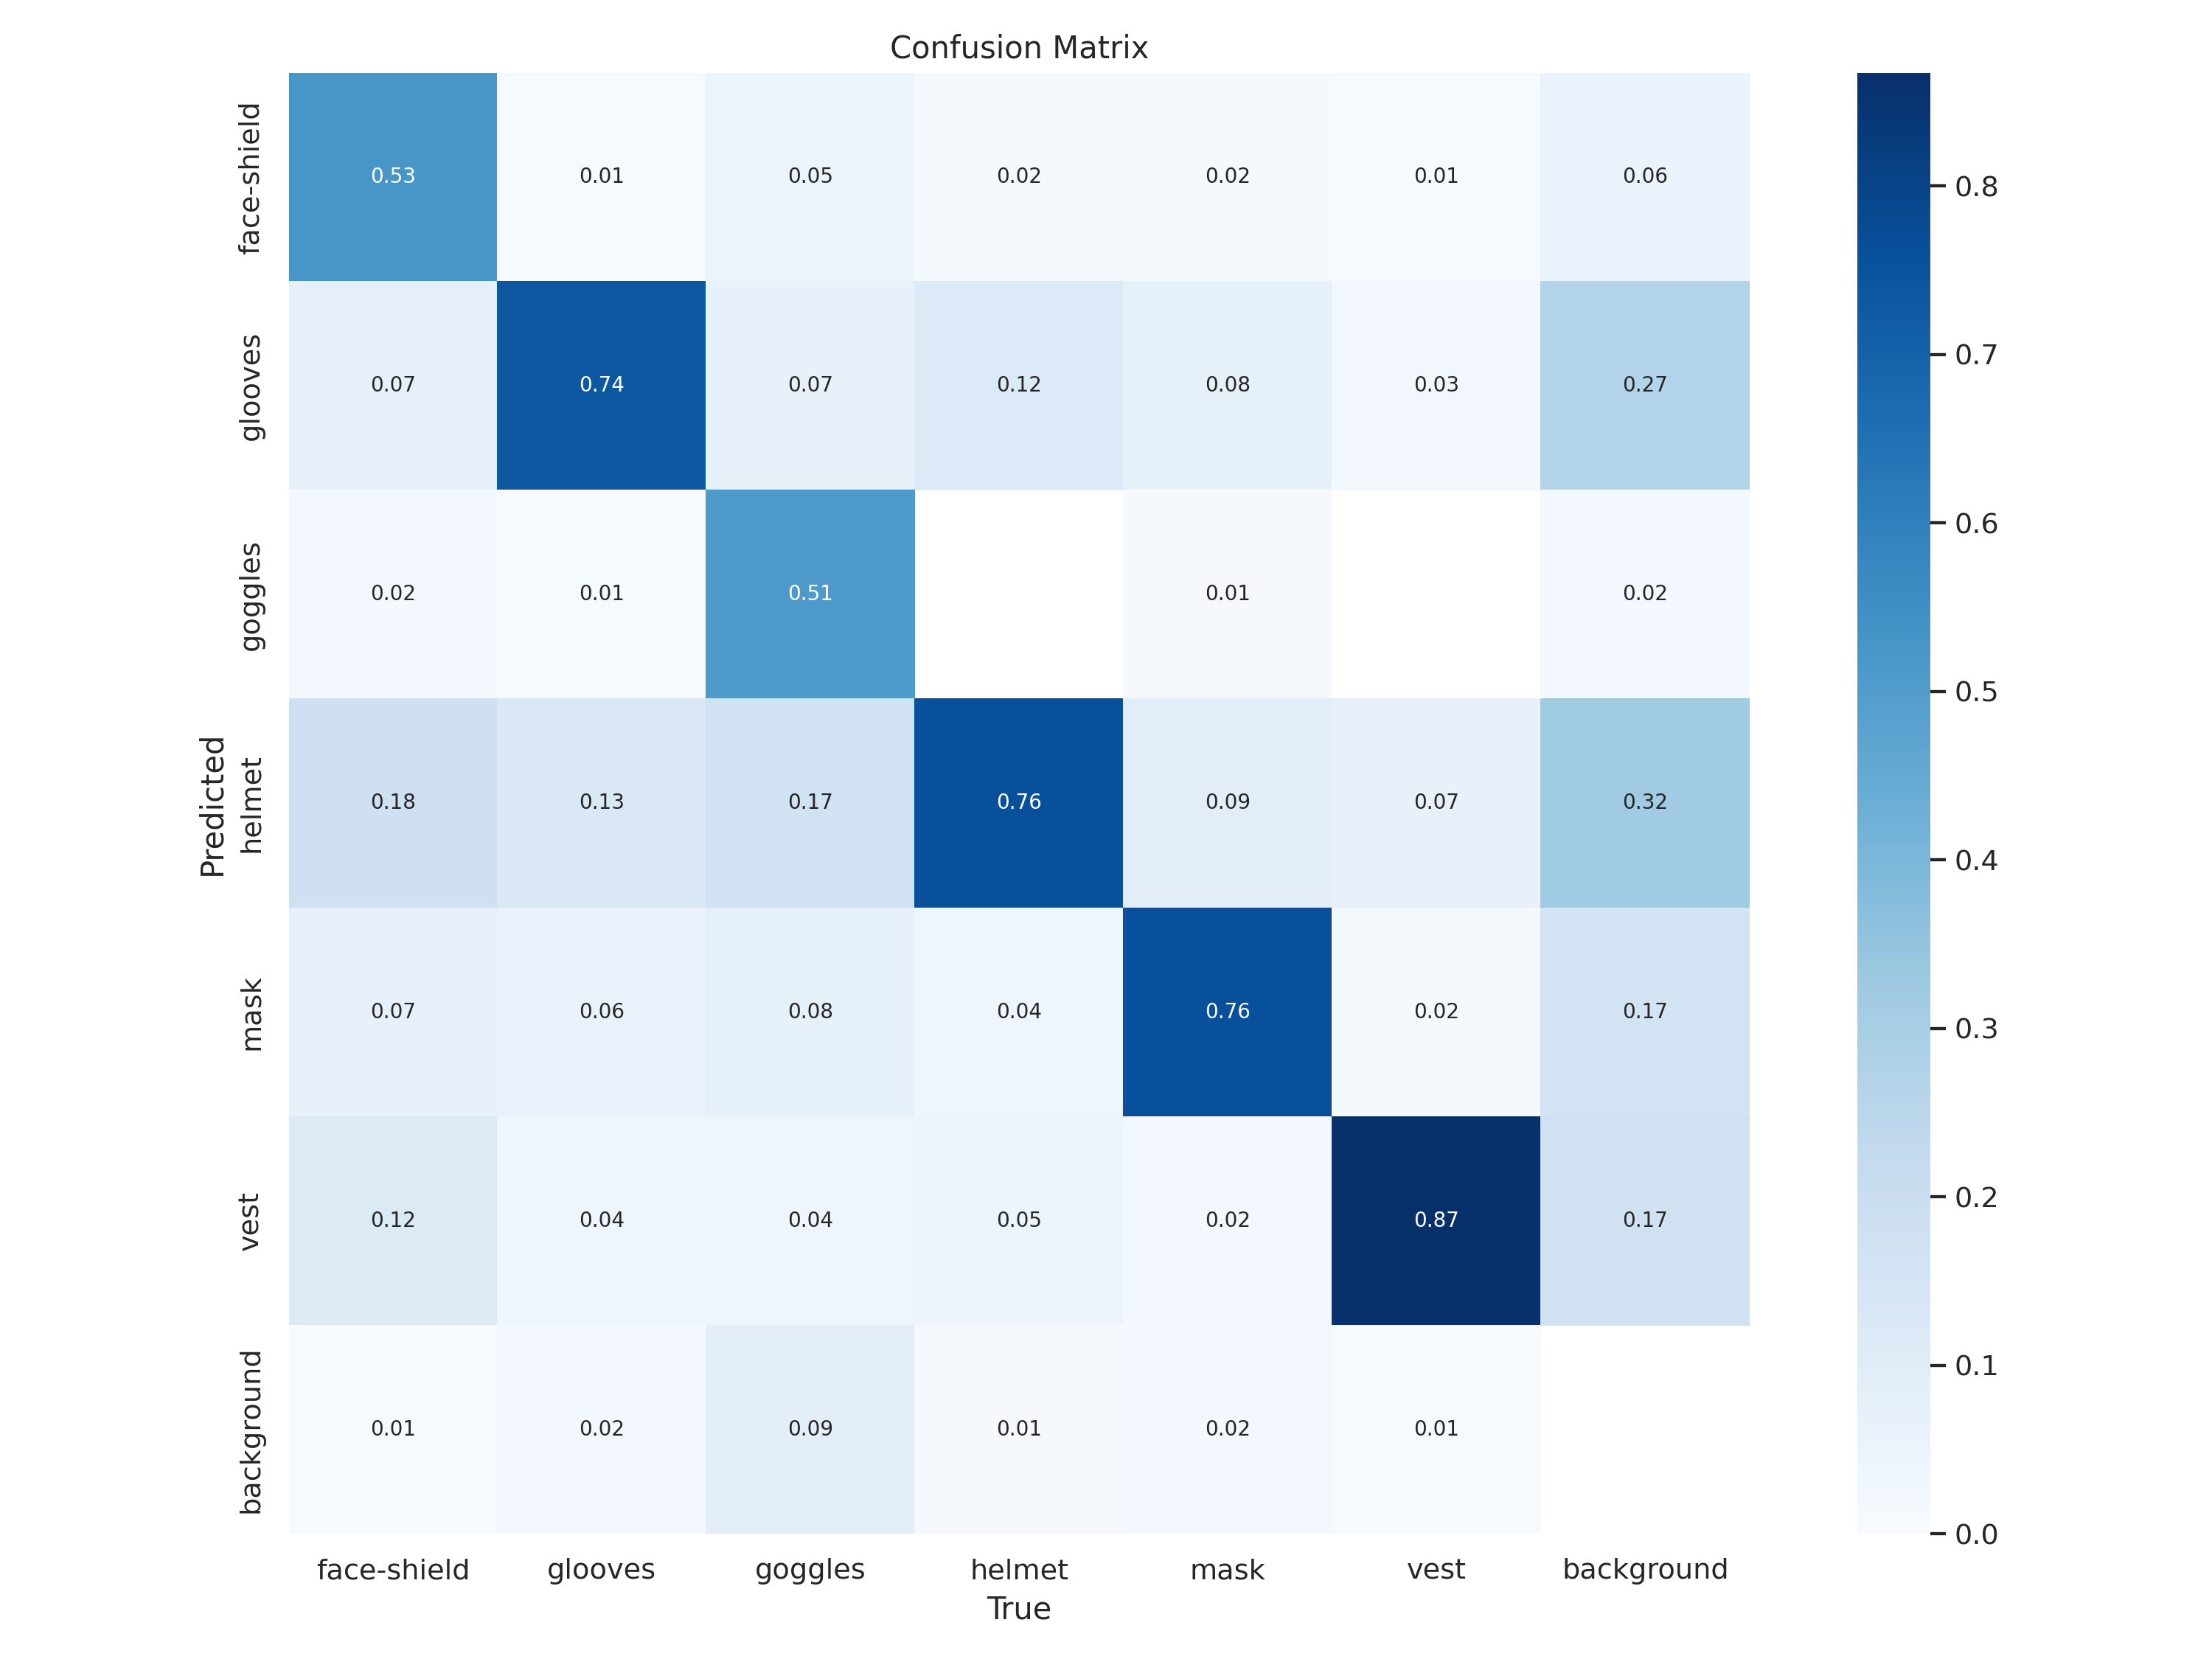

In [15]:
#Display of the confusion Matrix
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

# Observation of Confusion Matrix:

- % of correctly indentification of face-shield as face-shield is 53% only.

- % of correctly indentification of gloves as gloves is 74%.

- % of correctly indentification of goggles as goggles is 51%.

- % of correctly indentification of helmet as helmet is 76%.

- % of correctly indentification of mask as mask is 76%.

- % of correctly indentification of vest as vest is 87%.

Prediction could be better if I selected more epochs and a database with more clear images.

# Some Important Matrics:

Loss: The loss function of object detectors is a combination of two individual loss functions: Bounding Box Regression (Which will measure how well predicted bounding boxes captures ground truth bounding boxes), Cross Entropy Loss (Which will measure how good a job the detector did in predicting the correct class)

Precision: Precision should ideally be 1 (high) for a good classifier. Precision becomes 1 only when the numerator and denominator are equal i.e TP = TP +FP, this also means FP is zero. As FP increases the value of denominator becomes greater than the numerator and precision value decreases (which we don't want).

Recall: Recall should ideally be 1 (high) for a good classifier. Recall becomes 1 only when the numerator and denominator are equal i.e TP = TP +FN, this also means FN is zero. As FN increases the value of denominator becomes greater than the numerator and recall value decreases (which we don't want).


/content


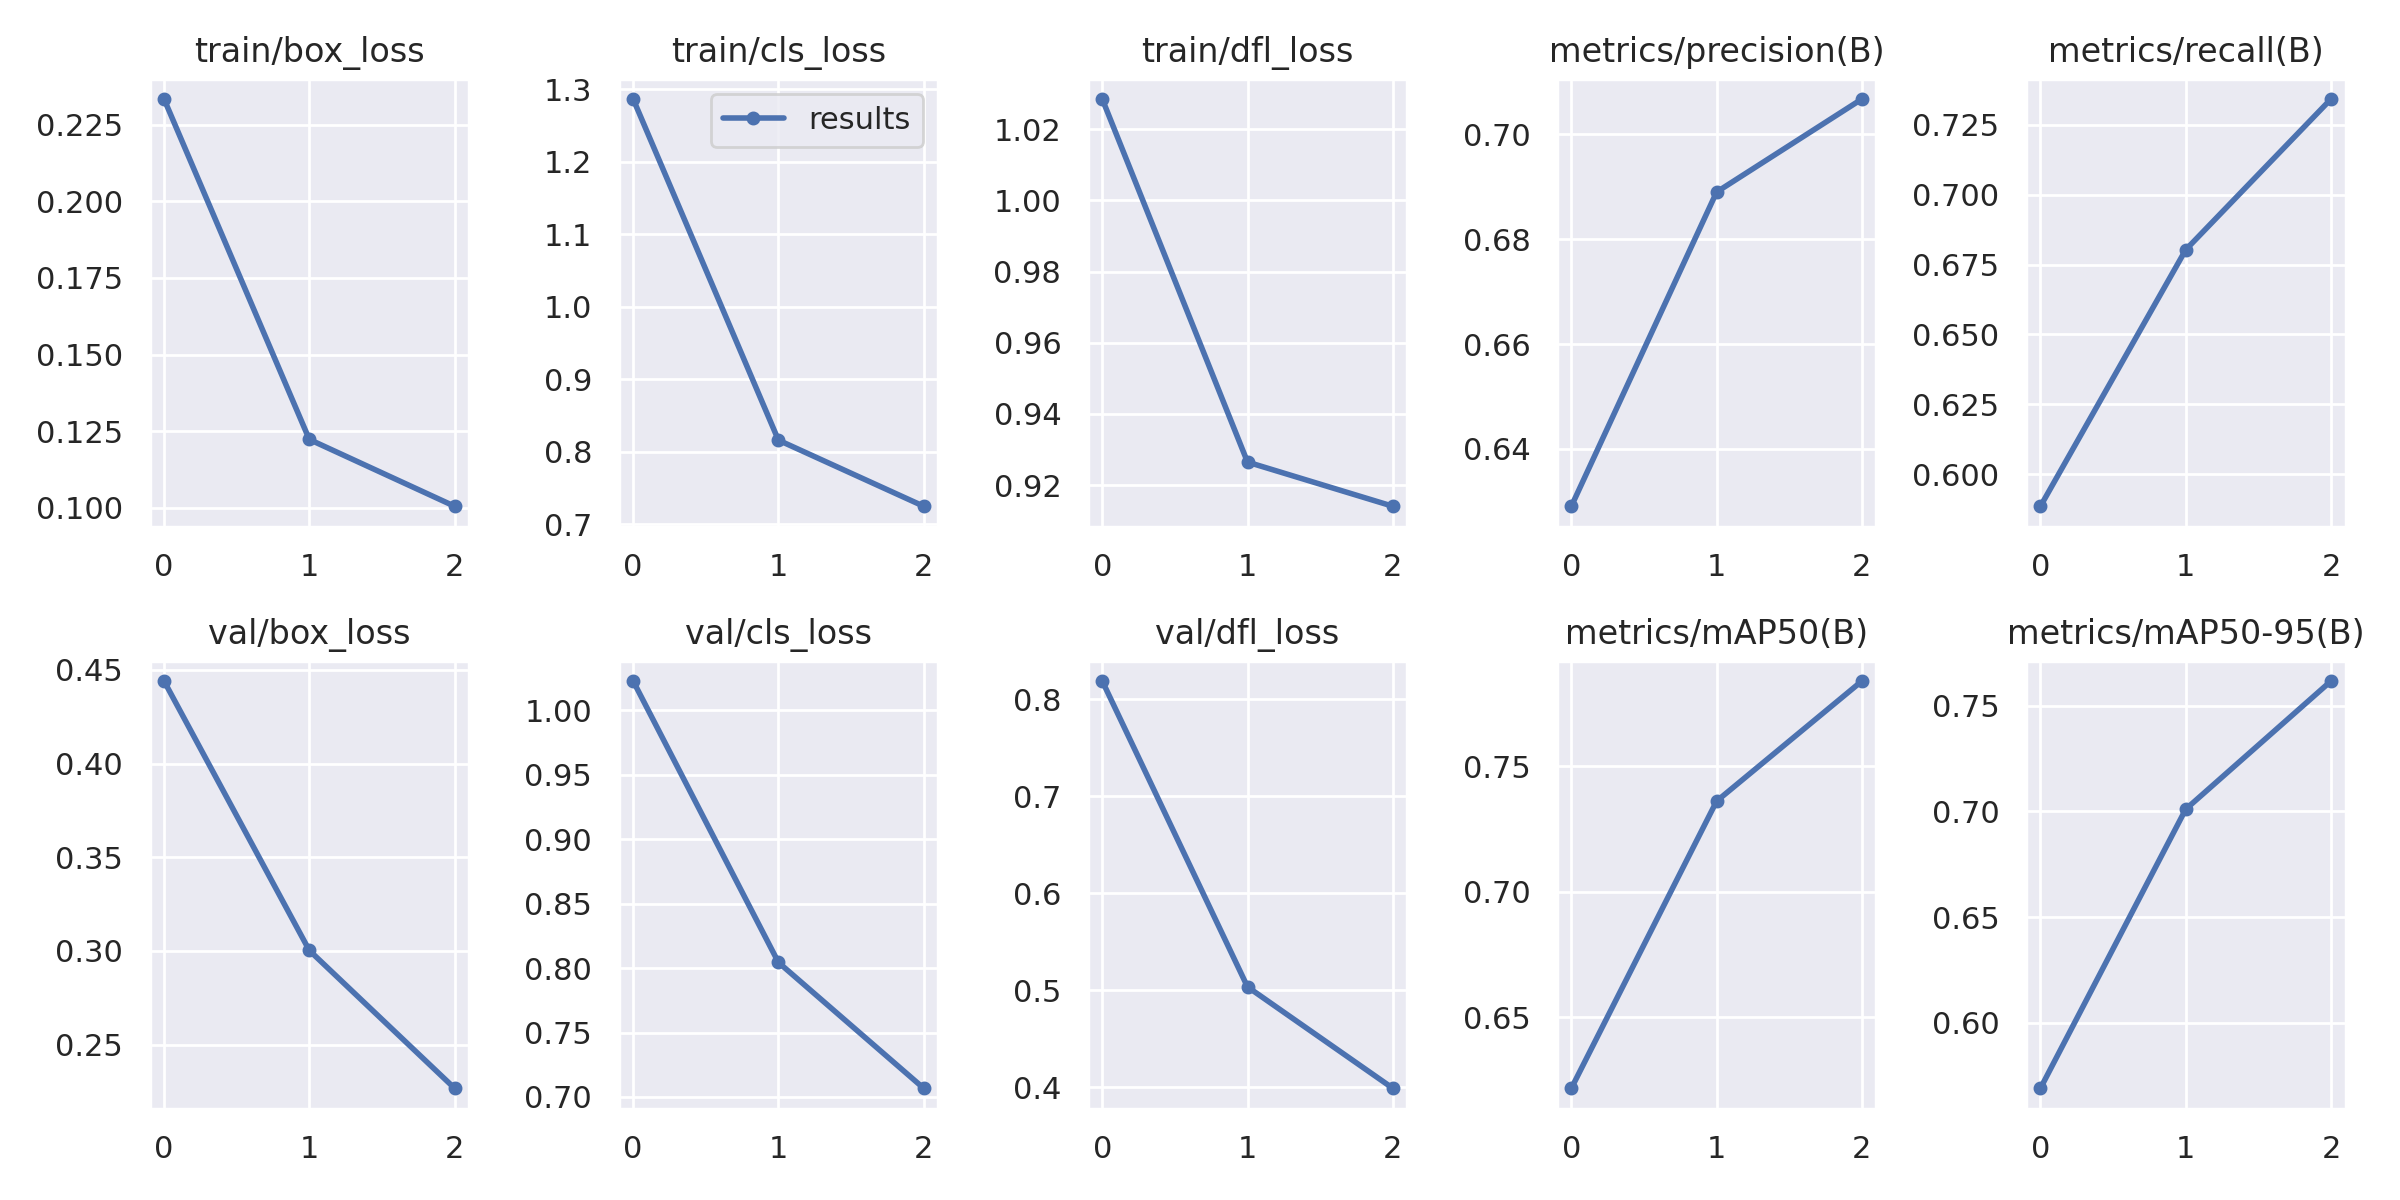

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

# Displaying Some Images:

/content


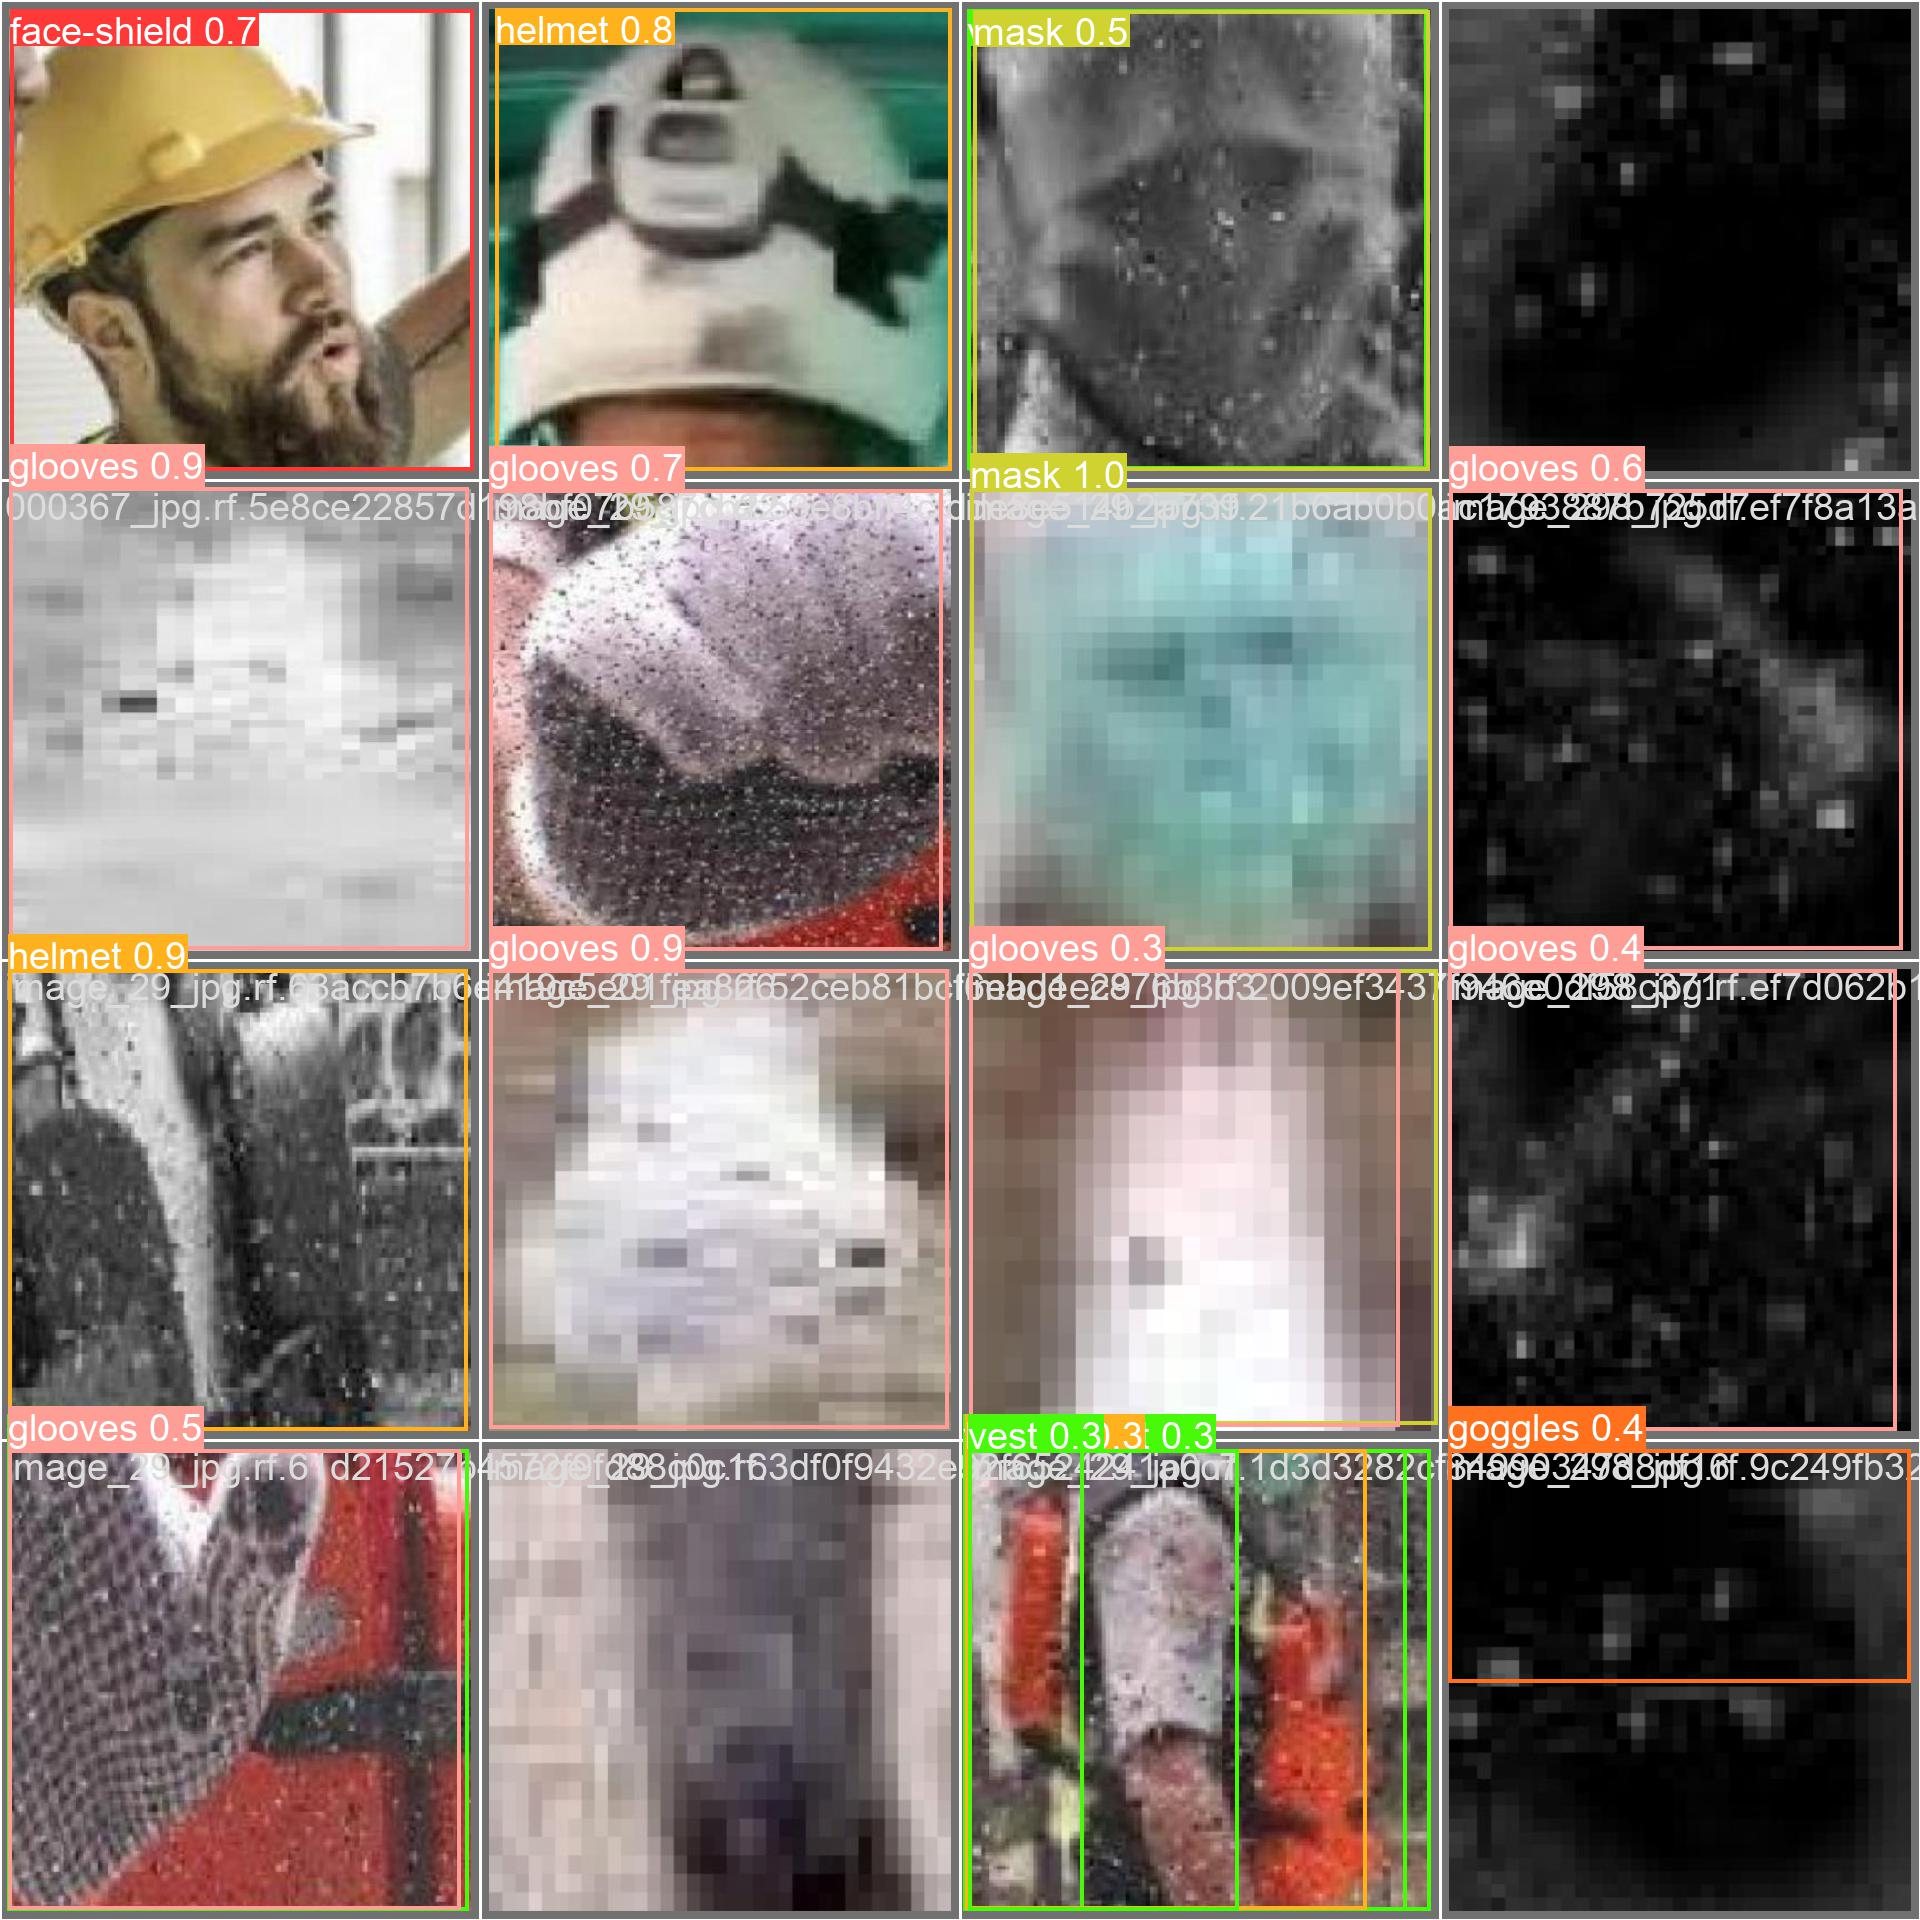

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

While validating, using weight of the trained model(best.pt)

In [18]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/ppe-dataset-6/valid/labels.cache... 8552 images, 790 backgrounds, 0 corrupt: 100% 8552/8552 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 535/535 [02:51<00:00,  3.11it/s]
                   all       8552       7762      0.707      0.734      0.784      0.762
           face-shield       8552        205      0.491      0.571      0.546      0.538
               glooves       8552       2063      0.764      0.783      0.873      0.837
               goggles       8552        433      0.753      0.464      0.627       0.59
                helmet       8552       1560      0.637      0.867      0.844      0.831
                  mask       8552       1124       0.72      0.811       0.86      0.831
                  ve

## Inference with Custom Model

Predicting PPE items from test images using weight (best.pt) from trained model.

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
image 1/4483 /content/datasets/ppe-dataset-6/test/images/000457_jpg.rf.0ccfde45fb1bccb8c63c1d0410363f0c.jpg: 800x800 1 helmet, 1 vest, 26.1ms
image 2/4483 /content/datasets/ppe-dataset-6/test/images/000457_jpg.rf.160b951de2b359797e7744e13d45b5a9.jpg: 800x800 1 helmet, 26.2ms
image 3/4483 /content/datasets/ppe-dataset-6/test/images/000457_jpg.rf.183d3df655c9cc1d204bc8eeb3b99e68.jpg: 800x800 1 vest, 26.1ms
image 4/4483 /content/datasets/ppe-dataset-6/test/images/000457_jpg.rf.22f530058a6f1462c58f42cb4beadb72.jpg: 800x800 1 helmet, 26.1ms
image 5/4483 /content/datasets/ppe-dataset-6/test/images/000457_jpg.rf.379f3c1a9879363b51ea5d592950c7ed.jpg: 800x800 1 glooves, 1 helmet, 22.2ms
image 6/4483 /content/datasets/ppe-dataset-6/test/images/000457_jpg.rf.5b5263471156a5a7f32ebc3d6cb1febe.jpg: 800x800 1 helmet, 1 vest, 1

**NOTE:** Let's take a look at few results.

In [20]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Video detection

Detecting PPE items from a test video. Video is saved after detection.

In [22]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25
source=/content/PPE_Test_video.mp4 save=True

Streaming output truncated to the last 5000 lines.
video 1/1 (14447/19444) /content/PPE_Test_video.mp4: 480x800 1 vest, 8.9ms
video 1/1 (14448/19444) /content/PPE_Test_video.mp4: 480x800 1 vest, 9.3ms
video 1/1 (14449/19444) /content/PPE_Test_video.mp4: 480x800 1 vest, 13.2ms
video 1/1 (14450/19444) /content/PPE_Test_video.mp4: 480x800 1 vest, 9.7ms
video 1/1 (14451/19444) /content/PPE_Test_video.mp4: 480x800 1 vest, 8.8ms
video 1/1 (14452/19444) /content/PPE_Test_video.mp4: 480x800 1 vest, 8.8ms
video 1/1 (14453/19444) /content/PPE_Test_video.mp4: 480x800 1 vest, 9.2ms
video 1/1 (14454/19444) /content/PPE_Test_video.mp4: 480x800 1 vest, 8.9ms
video 1/1 (14455/19444) /content/PPE_Test_video.mp4: 480x800 2 vests, 8.7ms
video 1/1 (14456/19444) /content/PPE_Test_video.mp4: 480x800 2 vests, 8.7ms
video 1/1 (14457/19444) /content/PPE_Test_video.mp4: 480x800 1 vest, 8.6ms
video 1/1 (14458/19444) /content/PPE_Test_video.mp4: 480x800 1 vest, 10.0ms
video 1/1 (14459/19444) /content/PPE_Test_vid

# Limitations of the Project:

-- The dataset I have selected was not good enough in terms of image quality. Most of the images are blur, which is a cause 
of wrong prediction.

-- I have choose only three epochs, which has negative impact in the accuracy.

-- Because of shortage of time and late understanding, I have build the model to detect PPE items from 
images and recorded video only; I could not able to manage myself to detect PPE items from live cam.

# Challenges and Possible Solutions to Achieve the Goal:

-- Better accuracy could be gained by train the model with custom dataset; but for that, datasets I have found in the internet were imbalanced, misclassified and poor quality. It requires more time to self collection of data, label and annotate these data for feeding the model as input. Unfortunately, I had shortage of time.

-- Besides, computer power was also an issue. To get good result from model, model has to train with more epochs, which requires high GPU capacity; unfortunately, I was lack of that. This problem can be solved by purchasing GPU packages.


# Observation:

-- Model is detecting 'PPE items' from recorded video but there are some misclassification.

-- This misclassification can be solved and can get better result from the model by computer power (GPU package), 
good dataset and train the model with enough epochs.

-- The YOLOv8 algorithm, I found very user friendly. It is easy to use and have lots of default features. If users want, easily they can use this project to train the model for their own purpose just changing the dataset here and change the path of the video to predict.


### Learning Resources

-- https://docs.ultralytics.com/

-- https://roboflow.com/

-- https://www.youtube.com/watch?v=wuZtUMEiKWY

-- https://www.youtube.com/watch?v=k7B2ZqffDRE&list=PLv8Cp2NvcY8ATPRk4LycJWr5YWB_svhrW

# ----------------------------------------Thank You---------------------------------------------------